<a href="https://colab.research.google.com/github/PANKAJ-GUPTA-201998/Time-Series-Forcasting-By-ARIMA-Holt-Winters-/blob/main/Memory7200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#!pip install pmdarima

In [25]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [26]:
do = pd.read_csv('/content/ACTUAL_DATASET.csv')
data =do.iloc[:1440]
del data['CPU']
data.columns = ['Time','Request']
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y %H:%M:%S')
Time = data.pop('Time')
data.head()

,Request
0,739
1,963
2,824
3,499
4,292


In [27]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data)

print('ADF Statistic: %f' % adf_test[0])
print('No of Lags: %f' % adf_test[2])
print('No of Observations: %f' % adf_test[3])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.995045
No of Lags: 24.000000
No of Observations: 1415.000000
Critical Values @ 0.05: -2.86
p-value: 0.000023


<Figure size 720x432 with 0 Axes>

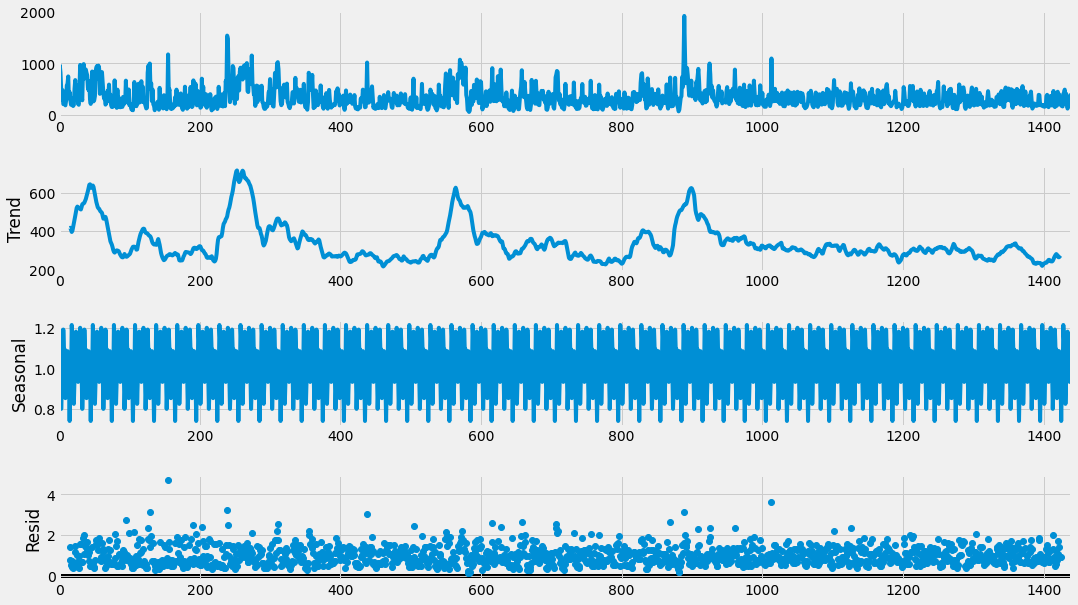

In [28]:
result = seasonal_decompose(data, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


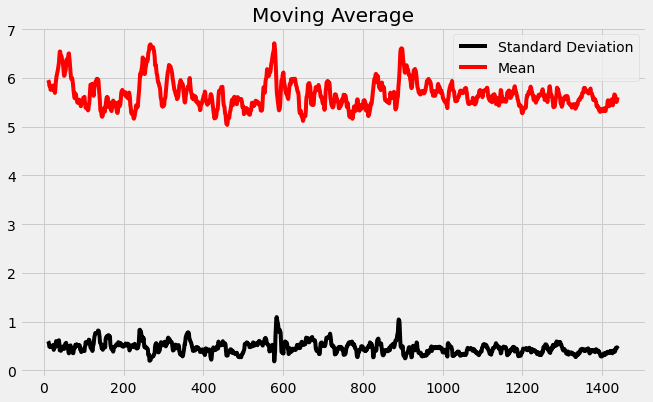

In [29]:
# Convert data on Log to reduce the magnitude of the values and reduce the rising trend in the series 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

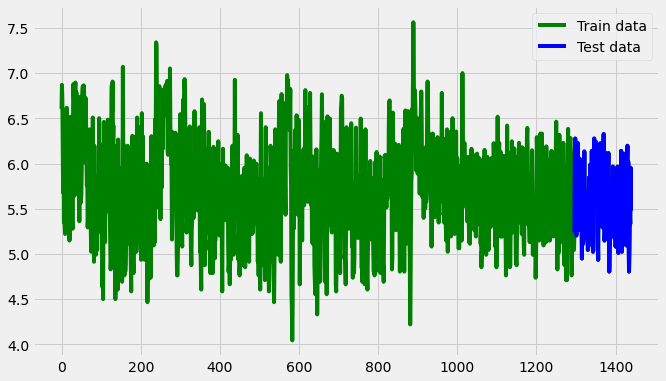

In [30]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [31]:
# Check the corrct values and model
model_autoARIMA1 = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8177.011, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6689.248, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1899.133, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1753.390, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1749.086, Time=0.96 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1777.700, Time=1.49 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1610.320, Time=1.47 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1750.559, Time=1.10 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1606.294, Time=1.74 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=1601.014, Time=1.89 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1603.658, Time=1.67 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=1646.7

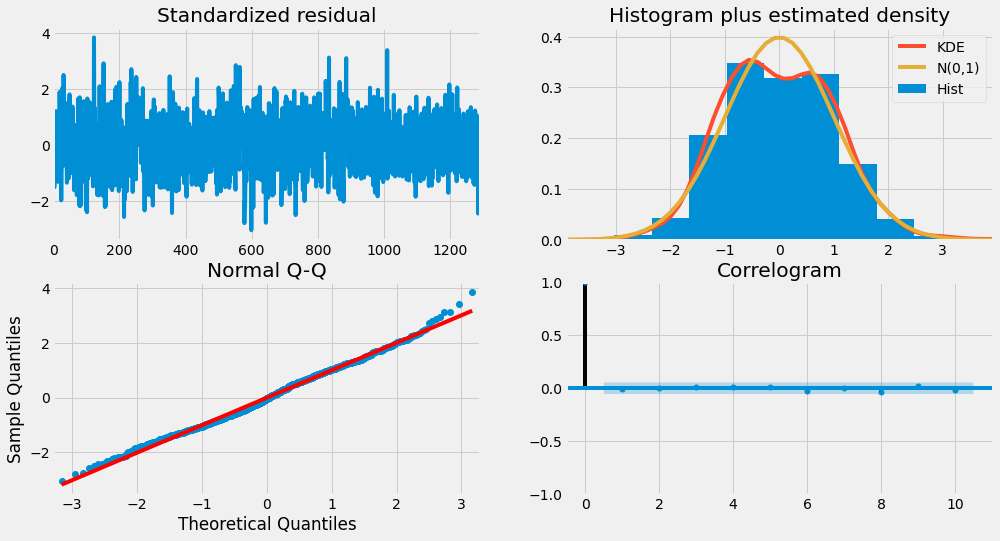

In [32]:
# Residual Data plot
model_autoARIMA1.plot_diagnostics(figsize=(15,8))
plt.show()

In [33]:
import statsmodels.api as sm

In [34]:
# Fit the data on ARMA modeal with parameter (3,3)
model = sm.tsa.arima.ARIMA(train_data, order=(3, 0, 3))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                Request   No. Observations:                 1293
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -784.996
Date:                Fri, 22 Apr 2022   AIC                           1585.992
Time:                        04:30:58   BIC                           1627.310
Sample:                             0   HQIC                          1601.499
                               - 1293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6836      0.051    112.005      0.000       5.584       5.783
ar.L1          0.2982      0.074      4.024      0.000       0.153       0.443
ar.L2          0.9721      0.015     63.342      0.0

In [35]:
# ljungbox test
import statsmodels.api as sm
sm.stats.acorr_ljungbox(fitted.resid, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,37.913115,0.009075


1296    5.489103
1297    5.366746
1298    5.700902
1299    5.443118
1300    5.730331
          ...   
1565    5.602966
1566    5.764123
1567    5.603296
1568    5.763794
1569    5.603625
Name: predicted_mean, Length: 274, dtype: float64


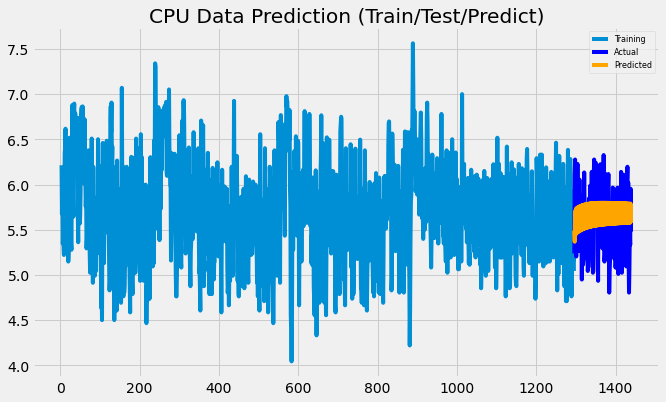

In [36]:
fc = fitted.forecast(274, alpha=0.05) 
print(fc) # 95% confidence
fc_series = pd.Series(fc, index=test_data.index, name="Request")
plt.plot(train_data, label='Training')
plt.plot(test_data, color = 'blue', label='Actual')
plt.plot(fc_series, color = 'orange',label='Predicted')
plt.title('CPU Data Prediction (Train/Test/Predict)')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [38]:
p = fc_series.to_frame()
fc = fc[:144]
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_data['Request']- p['Request']/np.abs(test_data['Request'])))
print('MAPE: '+str(mape))
mpe = np.mean((test_data['Request']- p['Request']/np.abs(test_data['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data['Request']- p['Request'])
print('ME: '+str(me))

MSE: 0.16141405412584717
MAE: 0.33757397861653476
RMSE: 0.4017636794508025
MAPE: 4.504157301966499
MPE: -97.2782216633503
ME: -0.13006718811917914


In [39]:
model_pr = sm.tsa.arima.ARIMA(df_log, order=(3, 0, 3))  
fitted_pr = model_pr.fit()  
print(fitted_pr.summary())

                               SARIMAX Results                                
Dep. Variable:                Request   No. Observations:                 1440
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -854.171
Date:                Fri, 22 Apr 2022   AIC                           1724.342
Time:                        04:31:35   BIC                           1766.521
Sample:                             0   HQIC                          1740.087
                               - 1440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6726      0.049    115.279      0.000       5.576       5.769
ar.L1          0.2827      0.067      4.229      0.000       0.152       0.414
ar.L2          0.9744      0.013     76.364      0.0

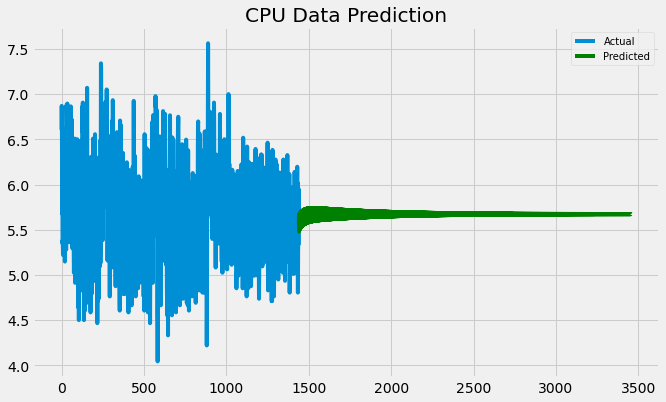

In [40]:
x = pd.Series(range(test_data.index.max()+1,4752))
fc_pr = fitted_pr.forecast(2016, alpha=0.05)  # 95% confidence
fc_series_pr = pd.Series(fc_pr, index = x, name="Request")
plt.plot(df_log, label='Actual')
plt.plot(fc_series_pr, color = 'green',label='Predicted')
plt.title('CPU Data Prediction')
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [41]:
pridict_data_CPU = np.round((np.exp(fc_series_pr)),0)
pridict_data_CPU.head()

1440    277.0
1441    240.0
1442    289.0
1443    244.0
1444    292.0
Name: Request, dtype: float64

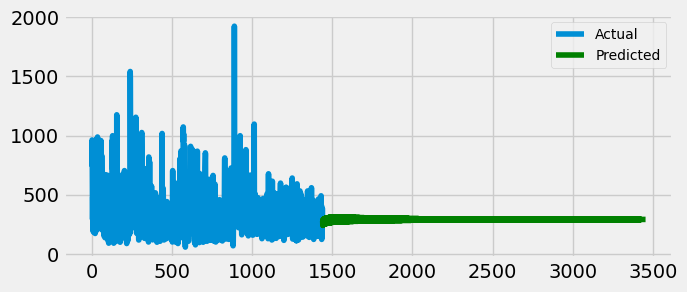

In [42]:
# Plot the actualy (Recovered) series with actual
plt.figure(figsize=(7,3), dpi=100)
plt.plot(data, label='Actual')
plt.plot(pridict_data_CPU, color = 'green',label='Predicted')
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [43]:
# Export data in 'pridict_data_CPU.csv' 
pridict_data_CPU.to_csv(r'Memory.csv', index = False)